In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
events = np.loadtxt("events_corner_id.txt")

In [37]:
#events = np.loadtxt("../data/events.txt")
time_range = [1.0, 2.5]
idx_range = [np.searchsorted(events[:,0], time_range[0]), np.searchsorted(events[:,0], time_range[1])]
events = events[idx_range[0]:idx_range[1], :]

In [38]:
def filter_patch(events, patch_center, patch_size):
    x_lim = (patch_center[1] - int(patch_size / 2), patch_center[1] + int(patch_size / 2) - 1)
    y_lim = (patch_center[0] - int(patch_size / 2), patch_center[0] + int(patch_size / 2) - 1)

    events_filtered = np.copy(events)
    events_filtered = events_filtered[
        np.logical_and((x_lim[0] <= events_filtered[:, 1]), (events_filtered[:, 1] <= x_lim[1]))]
    events_filtered = events_filtered[
        np.logical_and((y_lim[0] <= events_filtered[:, 2]), (events_filtered[:, 2] <= y_lim[1]))]
    # events_filtered = events_filtered[[(y_lim[0] >= events_range[:,2]) & (events_range[:,2] <= y_lim[1])]
    #vents_filtered = np.array(events_filtered)

    events_filtered[:,1] = (events_filtered[:,1] - patch_center[1] + int(patch_size / 2)).astype(int)
    events_filtered[:,2] = (events_filtered[:,2] - patch_center[0] + int(patch_size / 2)).astype(int)
    
    return events_filtered

In [39]:
patch_center = (90, 90)
patch_size = 180
shape = (patch_size, patch_size)
events = filter_patch(events, patch_center, patch_size)

In [40]:
t_start = events[0, 0]

In [41]:
last_time = np.zeros(shape)
last_id = np.zeros(shape)
time_difference = np.zeros(shape)
dist = 5
for e in events:
    if e[3] == 1:
        continue
    
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    last_id[y, x] = e[4]
    
    if x >= shape[1] - dist:
        continue
    
    if last_time[y, x+dist] != 0:
        if last_id[y, x + dist] == e[4]:
            time_difference[y, x] = e[0] - last_time[y, x+dist]

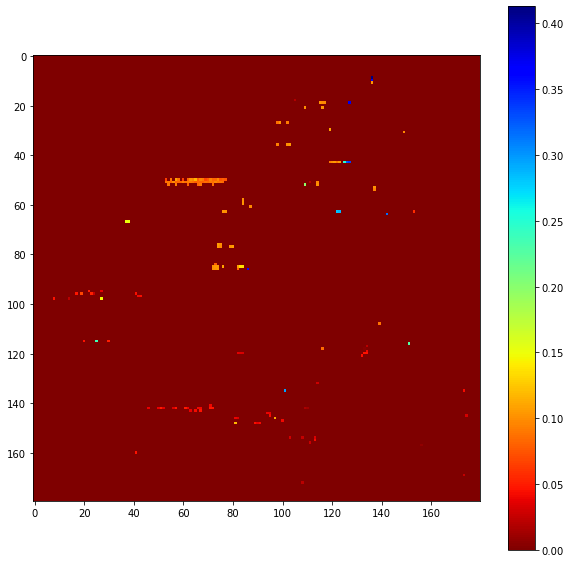

In [42]:
%matplotlib inline
plt.figure(figsize=(10, 10))
m = plt.imshow(time_difference, cmap="jet_r", interpolation="none")
plt.colorbar(mappable=m)